In [223]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv("Churn_Modelling.csv")

## Checking the data quality

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


We don't need the row number column and the surname column

In [4]:
df.drop(['RowNumber','Surname'],axis=1,inplace=True)

In [5]:
df.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.dtypes

CustomerId           int64
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [8]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
df.isna().sum()

CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [48]:
df.duplicated().sum()

0

In [11]:
df.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

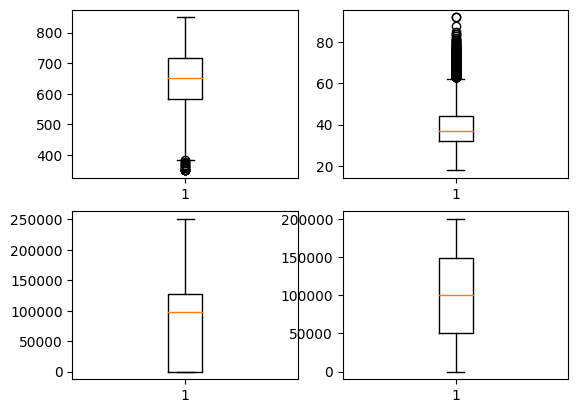

In [47]:
cols=[ 'CreditScore',  'Age',
       'Balance', 'EstimatedSalary']
fig,ax=plt.subplots(2,2)
k=0
for i in range(2):
    for j in range(2):
        ax[i,j].boxplot(df[cols[k]])
        k+=1

In [31]:
df.loc[df['EstimatedSalary']==df['EstimatedSalary'].min()]

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2362,15791053,709,Germany,Male,45,4,122917.71,1,1,1,11.58,1


In [35]:
df['EstimatedSalary'].sort_values(ascending=False).head(30)

6646    199992.48
3580    199970.74
4417    199953.33
9096    199929.17
8926    199909.32
5958    199862.75
1378    199857.47
6402    199841.32
8088    199808.10
6125    199805.63
3830    199775.67
1986    199761.29
9396    199753.97
6007    199727.72
118     199725.39
4547    199693.84
5631    199674.83
657     199661.50
9789    199657.46
431     199645.45
2956    199644.20
247     199638.56
5652    199635.93
6089    199527.34
1014    199505.53
364     199493.38
5876    199484.96
9480    199478.05
4553    199464.08
8772    199454.37
Name: EstimatedSalary, dtype: float64

No anomalies in our Dataset or outliers spotted from the describe method or the boxplots

## EDA

### Univariate Analysis of numerical columns

Check the distribution of each numeric column

In [25]:
df.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

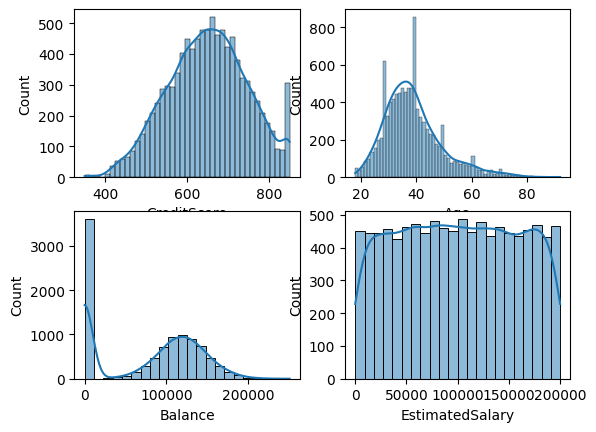

In [69]:
numeric_cols=[ 'CreditScore', 'Age',
       'Balance','EstimatedSalary']

fig,ax=plt.subplots(2,2)

k=0

for i in range(2):
    for j in range(2):
        sns.histplot(df[numeric_cols[k]],ax=ax[i,j],kde=True)
        k+=1

Remaques

### Univariate analysis of categorical variables

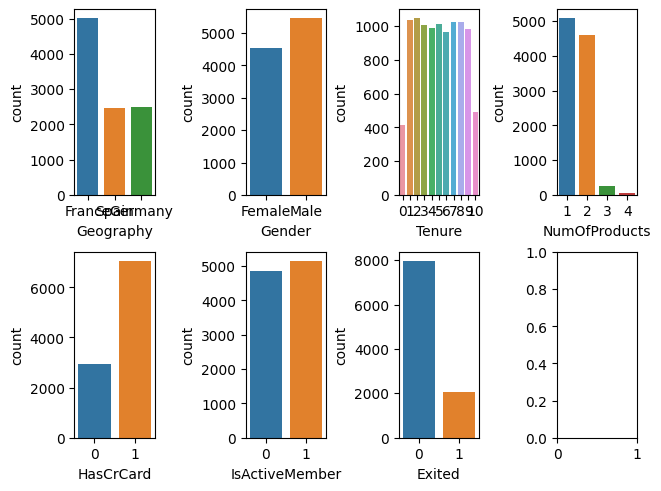

In [61]:
cat_cols=['Geography', 'Gender',  'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']
fig,axs=plt.subplots(2,4,constrained_layout=True)
k=0
for i in range(2):
    for j in range(4) :
        sns.countplot(data=df,x=cat_cols[k],ax=axs[i,j])
        if i==1 and j==2:
            break
        k+=1

The number of french customer is almost the double of the spanich customers and the double of the german customers <br>
Male customers are  more than female customers but not a big difference <br>
The most frequent number of products are 1 and 2<br>
the number of people having credit cards is almost the number of who don't x3 <br>
active members are more than inactive members but not that big difference <br>
the number of people who didnt exit is much larger than those who exited<br>

## Bivariate Analysis

In [70]:
df.corr()

C:\Users\nidha\AppData\Local\Temp\ipykernel_4888\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


C:\Users\nidha\AppData\Local\Temp\ipykernel_4888\2284044174.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot:>

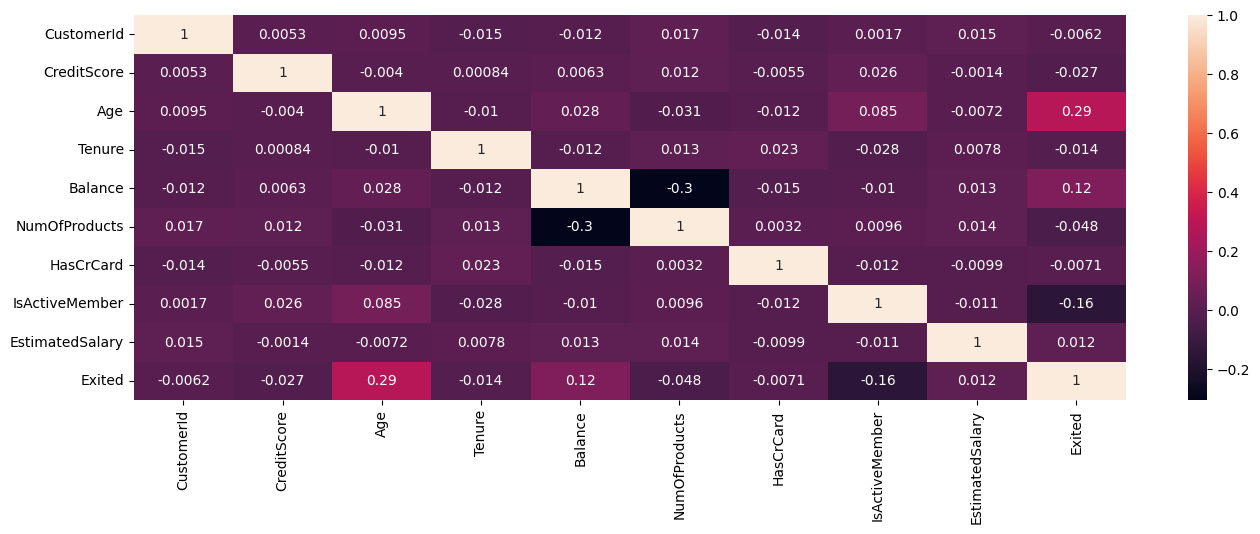

In [74]:
plt.figure(figsize=(16,5))
sns.heatmap(df.corr(),annot=True)

In [75]:
df.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

### Estimated Salary vs Geography

In [76]:
df.groupby('Geography')['EstimatedSalary'].mean()

Geography
France      99899.180814
Germany    101113.435102
Spain       99440.572281
Name: EstimatedSalary, dtype: float64

<AxesSubplot:xlabel='Geography', ylabel='EstimatedSalary'>

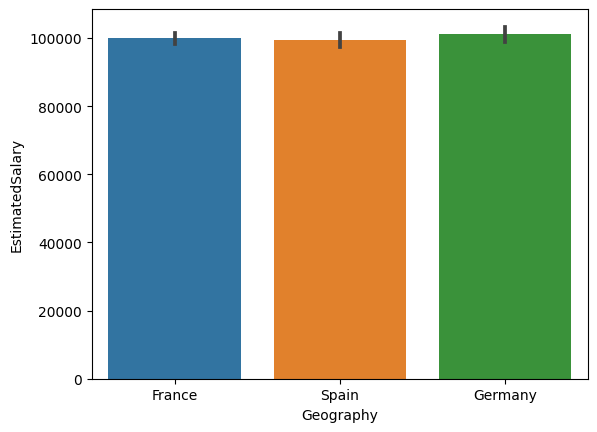

In [77]:
sns.barplot(data=df,x='Geography',y='EstimatedSalary')

Almost the same average salary in all countries

### Gender Vs Estimated salary

In [78]:
df.groupby('Gender')['EstimatedSalary'].mean()

Gender
Female    100601.541382
Male       99664.576931
Name: EstimatedSalary, dtype: float64

<AxesSubplot:xlabel='Gender', ylabel='EstimatedSalary'>

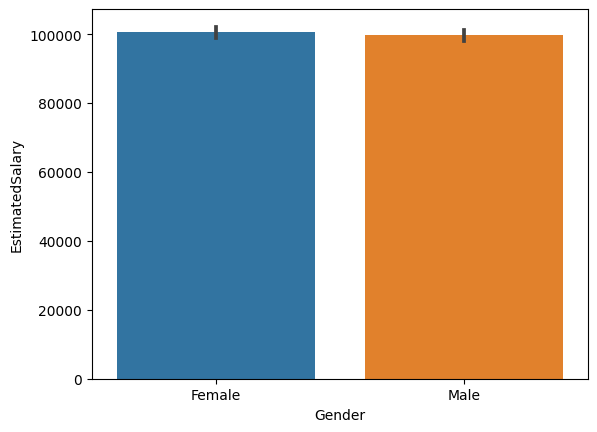

In [79]:
sns.barplot(data=df,x="Gender",y="EstimatedSalary")

Almost the same average salary for male and female

###  HasCrCard vs geography

In [83]:
df.groupby("Geography")['HasCrCard'].value_counts()

Geography  HasCrCard
France     1            3543
           0            1471
Germany    1            1791
           0             718
Spain      1            1721
           0             756
Name: HasCrCard, dtype: int64

<AxesSubplot:xlabel='Geography', ylabel='count'>

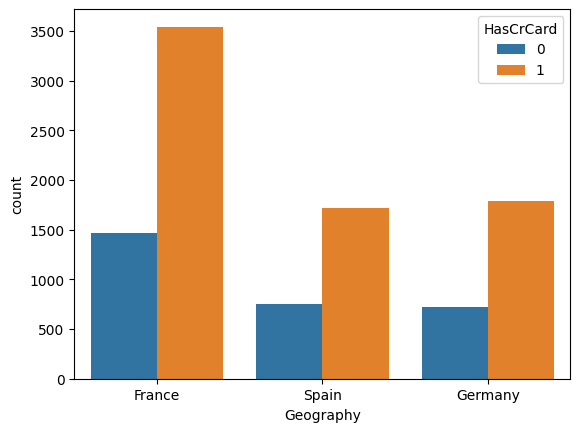

In [82]:
sns.countplot(data=df,x="Geography",hue="HasCrCard")

### HasCrCard vs gender

In [84]:
df.groupby("Gender")['HasCrCard'].value_counts()

Gender  HasCrCard
Female  1            3192
        0            1351
Male    1            3863
        0            1594
Name: HasCrCard, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

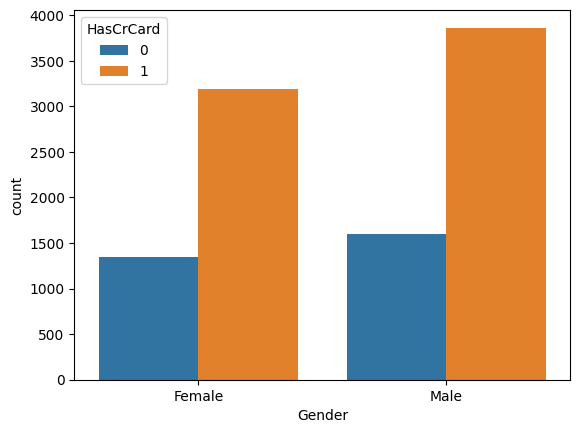

In [85]:
sns.countplot(data=df,x="Gender",hue="HasCrCard")

### IsActiveMember vs geography

In [86]:
df.groupby("Geography")['IsActiveMember'].value_counts()

Geography  IsActiveMember
France     1                 2591
           0                 2423
Germany    0                 1261
           1                 1248
Spain      1                 1312
           0                 1165
Name: IsActiveMember, dtype: int64

<AxesSubplot:xlabel='Geography', ylabel='count'>

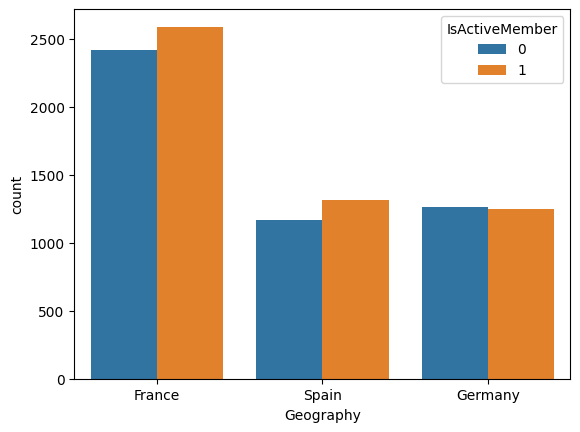

In [87]:
sns.countplot(data=df,x="Geography",hue="IsActiveMember")

### IsActiveMember vs gender

In [88]:
df.groupby("Gender")['IsActiveMember'].value_counts()

Gender  IsActiveMember
Female  1                 2284
        0                 2259
Male    1                 2867
        0                 2590
Name: IsActiveMember, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

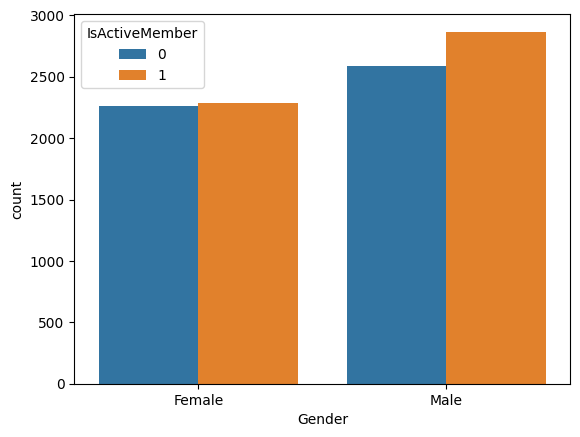

In [89]:
sns.countplot(data=df,x="Gender",hue="IsActiveMember")

### Estimated salary vs age

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Age'>

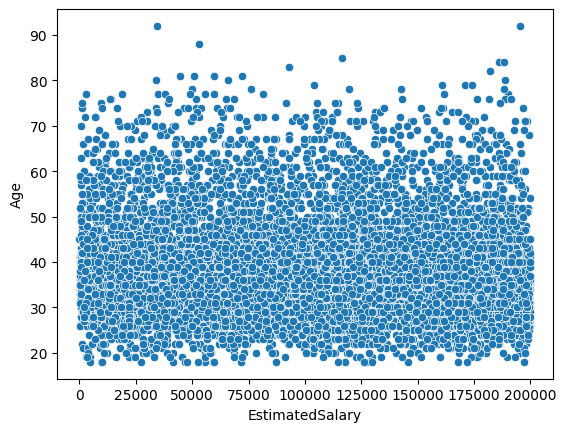

In [91]:
sns.scatterplot(data=df,x='EstimatedSalary',y='Age')

### EstimatedSalary VS Balance

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Balance'>

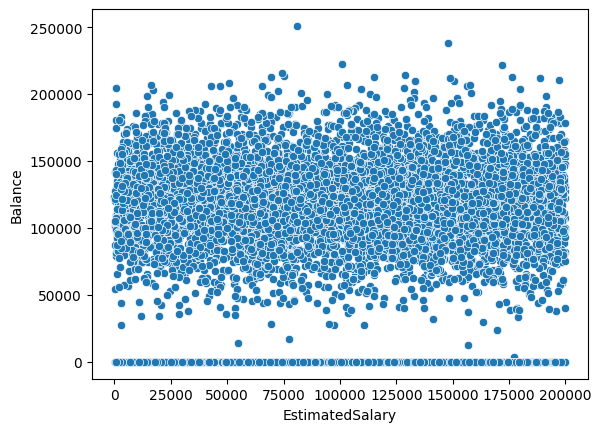

In [93]:
sns.scatterplot(data=df,x='EstimatedSalary',y='Balance')

### Exited VS Geography

In [107]:
df.groupby('Geography')['Exited'].value_counts()

Geography  Exited
France     0         4204
           1          810
Germany    0         1695
           1          814
Spain      0         2064
           1          413
Name: Exited, dtype: int64

<AxesSubplot:xlabel='Geography', ylabel='count'>

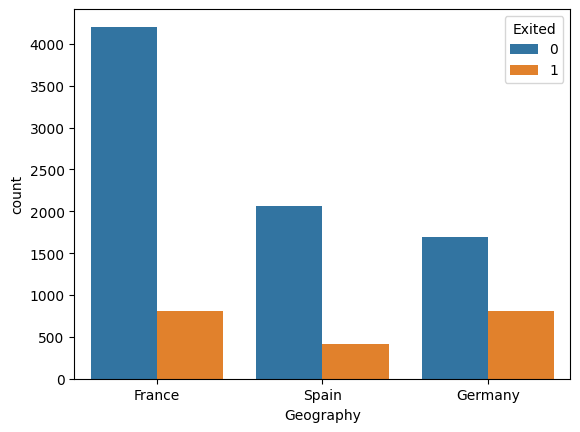

In [108]:
sns.countplot(data=df,x='Geography',hue='Exited')

Dropping the customerID column because its useless for the model

In [97]:
df.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [98]:
df.drop('CustomerId',axis=1,inplace=True)

## Feature Engineering

In [99]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [100]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [101]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [102]:
df['Gender']=df['Gender'].map({'Female':1, 'Male':0})

In [103]:
df.Gender.dtype

dtype('int64')

In [105]:
#Memory optimization
df.Gender=df.Gender.astype('int8')

In [106]:
df.Gender.dtype

dtype('int8')

In [109]:
df=pd.get_dummies(df,columns=['Geography'],drop_first=True)

In [110]:
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [111]:
df.dtypes

CreditScore            int64
Gender                  int8
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [114]:
df['Tenure']=df['Tenure'].astype('int8')

In [117]:
df['NumOfProducts']=df['NumOfProducts'].astype('int8')

In [118]:
df['HasCrCard']=df['HasCrCard'].astype("int8")

In [120]:
df[['IsActiveMember','Exited']]=df[['IsActiveMember','Exited']].astype('int8')

In [121]:
df.dtypes

CreditScore            int64
Gender                  int8
Age                    int64
Tenure                  int8
Balance              float64
NumOfProducts           int8
HasCrCard               int8
IsActiveMember          int8
EstimatedSalary      float64
Exited                  int8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [122]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1


## Split the data

In [129]:
from sklearn.model_selection import train_test_split

In [131]:
X=df.drop('Exited',axis=1)

In [132]:
y=df['Exited']

In [133]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Feature Scaling

In [123]:
from sklearn.preprocessing import StandardScaler

In [124]:
st=StandardScaler()

In [134]:
X_train=st.fit_transform(X_train)

In [135]:
X_test=st.fit_transform(X_test)

In [136]:
X_train

array([[ 0.35649971, -0.91324755, -0.6557859 , ...,  1.36766974,
        -0.57946723, -0.57638802],
       [-0.20389777, -0.91324755,  0.29493847, ...,  1.6612541 ,
         1.72572313, -0.57638802],
       [-0.96147213, -0.91324755, -1.41636539, ..., -0.25280688,
        -0.57946723,  1.73494238],
       ...,
       [ 0.86500853,  1.09499335, -0.08535128, ..., -0.1427649 ,
        -0.57946723, -0.57638802],
       [ 0.15932282, -0.91324755,  0.3900109 , ..., -0.05082558,
        -0.57946723, -0.57638802],
       [ 0.47065475, -0.91324755,  1.15059039, ..., -0.81456811,
         1.72572313, -0.57638802]])

## Logistic Regression

In [137]:
from sklearn.linear_model import LogisticRegression

In [138]:
lr=LogisticRegression()

In [139]:
lr.fit(X_train,y_train)

LogisticRegression()

In [140]:
lr_pred=lr.predict(X_test)

In [141]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
#metrics for classification problems

In [142]:
accuracy_score(y_test,lr_pred)

0.8105

In [143]:
recall_score(y_test,lr_pred)

0.2035623409669211

In [144]:
f1_score(y_test,lr_pred)

0.2968460111317254

In [145]:
precision_score(y_test,lr_pred)

0.547945205479452

Imbalanced data because recall score, f1 score and precision score are very low although accuracy is 80% <br>so accuracy is not a metric that we should rely on in this case and our data is imbalanced <br>


We have a class that is dominating the other wich is the people who didnt exit the bank (Exited =0) <br>
as we saw when we performed EDA that the number of people who didnt exit is almost 4 times the number of people who did <br>
so we should oversample the data

### Handling imbalanced dataset

In [148]:
!pip install imblearn
from imblearn.over_sampling import SMOTE

     -------------------------------------- 226.0/226.0 kB 1.1 MB/s eta 0:00:00


In [149]:
X_res,y_res=SMOTE().fit_resample(X,y)

In [152]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

Increased the minority class by replicating the data <br>
Now we can redo the testing phase

In [153]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.2,random_state=42)

Retraining the logistic regression model

In [154]:
lr.fit(X_train,y_train)

LogisticRegression()

In [155]:
lr_pred=lr.predict(X_test)

In [156]:
accuracy_score(y_test,lr_pred)

0.6635279347143754

accuracy have gone from 0.8 to 0.66 let's check for  other metrics

In [157]:
recall_score(y_test,lr_pred)

0.686413393432067

In [158]:
precision_score(y_test,lr_pred)

0.6456692913385826

In [159]:
f1_score(y_test,lr_pred)

0.6654182272159799

now we got some logic results for our baseline model lets save its accuracy to compare models at the end

In [160]:
lr_acc=accuracy_score(y_test,lr_pred)

In [167]:
lr_pre=precision_score(y_test,lr_pred)

## SVC

In [161]:
from sklearn.svm import SVC

In [162]:
svc=SVC()

In [163]:
svc.fit(X_train,y_train)

SVC()

In [165]:
svc_pred=svc.predict(X_test)

In [166]:
svc_acc=accuracy_score(y_test,svc_pred)

In [168]:
svc_pre=precision_score(y_test,svc_pred)

## KNeighbors classifier

In [169]:
from sklearn.neighbors import KNeighborsClassifier

In [170]:
knn=KNeighborsClassifier()

In [171]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [172]:
knn_pred=knn.predict(X_test)

In [173]:
knn_acc=accuracy_score(y_test,knn_pred)

In [174]:
knn_pre=precision_score(y_test,knn_pred)

## Decision Tree

In [176]:
from sklearn.tree import DecisionTreeClassifier

In [177]:
dtc=DecisionTreeClassifier()

In [178]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [179]:
dtc_pred=dtc.predict(X_test)

In [180]:
dtc_acc=accuracy_score(y_test,dtc_pred)

In [181]:
dtc_pre=precision_score(y_test,dtc_pred)

## Random Forest

In [183]:
from sklearn.ensemble import RandomForestClassifier

In [184]:
rfc=RandomForestClassifier()

In [185]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [186]:
rfc_pred=rfc.predict(X_test)

In [187]:
rfc_acc=accuracy_score(y_test,rfc_pred)

In [188]:
rfc_pre=precision_score(y_test,rfc_pred)

## Gradient Boosting

In [189]:
from sklearn.ensemble import GradientBoostingClassifier

In [190]:
gbc=GradientBoostingClassifier()

In [191]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [192]:
gbc_pred=gbc.predict(X_test)

In [193]:
gbc_acc=accuracy_score(y_test,gbc_pred)

In [194]:
gbc_pre=precision_score(y_test,gbc_pred)

## Comparing the models performance 

### Accuracy

<BarContainer object of 6 artists>

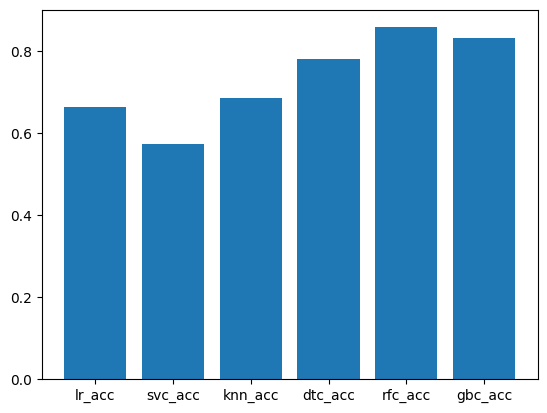

In [198]:
acc=[lr_acc,svc_acc,knn_acc,dtc_acc,rfc_acc,gbc_acc]
labels=["lr_acc","svc_acc","knn_acc","dtc_acc","rfc_acc","gbc_acc"]
plt.bar(height=acc,x=labels)

### Precision

<BarContainer object of 6 artists>

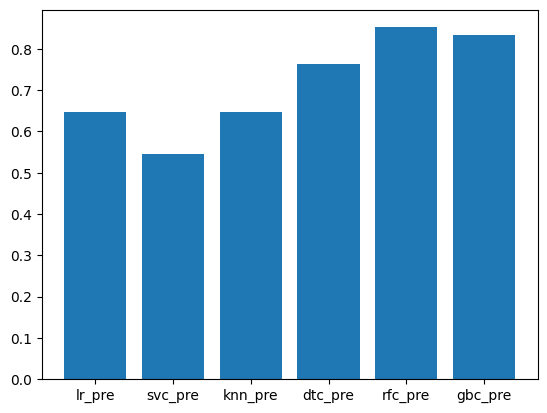

In [200]:
pre=[lr_pre,svc_pre,knn_pre,dtc_pre,rfc_pre,gbc_pre]
labels=["lr_pre","svc_pre","knn_pre","dtc_pre","rfc_pre","gbc_pre"]
plt.bar(height=pre,x=labels)

In [201]:
rfc_pre

0.8519463943841736

#### The best performing model in terms of  accuracy and precsion is the random forest classifier

## Saving the model

In [204]:
X_res=st.fit_transform(X_res)

In [205]:
#train on the entire dataset
rfc.fit(X_res,y_res)

RandomForestClassifier()

In [206]:
import joblib

In [207]:
joblib.dump(rfc,'Random_forest_churn_model.pkl')

['Random_forest_churn_model.pkl']

In [208]:
model=joblib.load(open('Random_forest_churn_model.pkl','rb'))

In [212]:
X.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain'],
      dtype='object')

In [220]:
testing={'CreditScore' :0, 'Gender' :0, 'Age':19, 'Tenure':1, 'Balance':0, 'NumOfProducts':1,
       'HasCrCard':0, 'IsActiveMember':0, 'EstimatedSalary':120, 'Geography_Germany':0,
       'Geography_Spain':0}
testing=pd.DataFrame(testing,index=['0'])
testing.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,0,0,19,1,0,1,0,0,120,0,0


In [222]:
model.predict(testing)[0]

C:\Users\nidha\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


1